# Variáveis Aleatórias e Suas Distribuições

In [2]:
import sys
sys.path.append("../..")

import numpy as np
import pandas as pd
import utils.justdoit as jdi

import matplotlib.pyplot as plt
plt.rcParams.update({
    "xtick.top": True,
    "ytick.right": True,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "font.size": 12,
    "font.family": "Lato",
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True
    })

## Variáveis Aleatórias

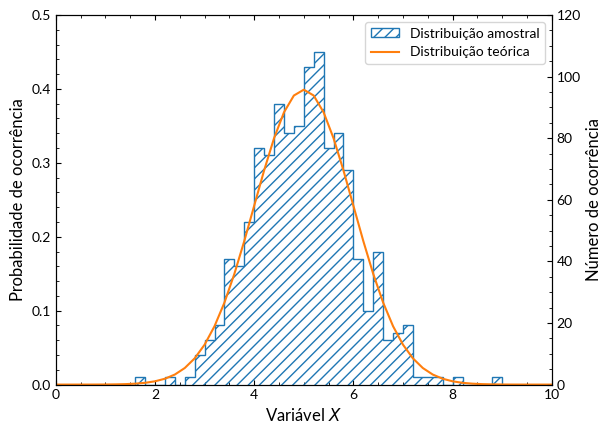

In [3]:
np.random.seed(42)

N: int = 500        # Número de amostras
mu: int = 5         # Média
sigma: float = 1.0  # Desvio padrão

# Variáveis aleatórias
amostra: np.ndarray = np.random.normal(loc=mu, scale=sigma, size=N)     

# Intervalo das amostras (Delta x = 0.2)
bins: np.ndarray = np.linspace(0, 10, 51)    

# Distribuição teórica
dist_teorica: np.ndarray = jdi.normal_fdp(bins, mu=mu, sigma=sigma)        

_, ax = plt.subplots()
ax.hist(amostra, bins = bins, hatch="///", histtype="step", 
        density=True, label="Distribuição amostral")
ax.plot(bins, dist_teorica, label="Distribuição teórica")

ax.set(xlabel="Variável $X$", ylabel="Probabilidade de ocorrência")
ax.axis([0, 10, 0, 0.5])
ax.legend()

ax2 = ax.twinx()
ax2.hist(amostra, bins = bins, alpha=0)

ax2.set(ylabel="Número de ocorrência")
ax2.axis([0, 10, 0, 120])

plt.savefig("../../tex/Figuras/2-1.pdf", bbox_inches="tight")
plt.show()

## Funções de Distribuição de Probabilidade

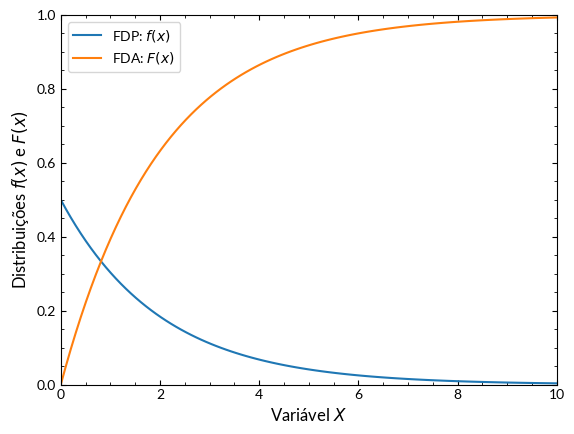

In [4]:
lambda_: float = 0.5
x: np.ndarray = np.linspace(0, 10, 100)

# Função densidade de probabilidade (FDP)
fdp: np.ndarray = jdi.exponencial_fdp(x, lamb=lambda_)  

# Função de distribuição acumulada (FDA)
fda: np.ndarray = jdi.exponencial_fda(x, lamb=lambda_)  

_, ax = plt.subplots()
ax.plot(x, fdp, label="FDP: $f(x)$")
ax.plot(x, fda, label="FDA: $F(x)$")

ax.set(xlabel="Variável $X$", ylabel="Distribuições $f(x)$ e $F(x)$")
ax.legend(loc="upper left")
ax.axis([0, 10, 0, 1])

plt.savefig("../../tex/Figuras/2-2.pdf", bbox_inches="tight")
plt.show()

---
## Resolução do Problema 2.3.

In [5]:
TUBO1 = pd.read_csv("../../data/thomson1.dat")
TUBO2 = pd.read_csv("../../data/thomson2.dat")

# Criando uma função útil para visualização das estatísticas
def estatisticas(tubo: pd.DataFrame):
    wq = tubo["w/q"]
    I = tubo["I"]
    
    stats = {}
    stats["Média de W/Q"] = jdi.media_amostral(wq)
    stats["Variância de W/Q"] = jdi.variancia_amostral(wq)
    stats["Média de I"] = jdi.media_amostral(I)
    stats["Variância de I"] = jdi.variancia_amostral(I)
    stats["Covariância entre W/Q e I"] = jdi.covariancia_amostral(wq, I)
    stats["Coeficiente de correlação entre W/Q e I"] = jdi.correlacao_amostral(wq, I)

    for key, value in stats.items():
        print(f"{key}: {round(value, 2)}")

print("## Tubo 1")
estatisticas(TUBO1)

print("\n## Tubo 2")
estatisticas(TUBO2)

## Tubo 1
Média de W/Q: 13.28
Variância de W/Q: 71.51
Média de I: 312.92
Variância de I: 8715.72
Covariância entre W/Q e I: 759.12
Coeficiente de correlação entre W/Q e I: 0.96

## Tubo 2
Média de W/Q: 2.92
Variância de W/Q: 0.67
Média de I: 174.27
Variância de I: 286.22
Covariância entre W/Q e I: 13.15
Coeficiente de correlação entre W/Q e I: 0.95


## Resolução do Problema 2.4.

In [6]:
# Concatenando os dois dataframes
tubos = pd.concat([TUBO1, TUBO2])

# Criando outra função útil para visualização das estatísticas
def estatisticas(tubo: pd.DataFrame, gas: str):
    tubo = tubo[tubo["gas"] == gas]
    me = tubo["m/e"]

    stats = {}
    stats["Quantidade"] = len(me)
    stats["Média de m/e"] = jdi.media_amostral(me)
    stats["Desvio Padrão de m/e"] = jdi.variancia_amostral(me) ** 0.5

    for key, value in stats.items():
        print(f"{key}: {round(value, 2)}")

print("## Tubo gás AR")
estatisticas(tubos, "ar")

print("\n## Tubo gás HIDROGÊNIO")
estatisticas(tubos, "hidrogênio")

print("\n## Tubo gás ÁCIDO CARBÔNICO")
estatisticas(tubos, "ácido carbônico")

## Tubo gás AR
Quantidade: 14
Média de m/e: 0.47
Desvio Padrão de m/e: 0.09

## Tubo gás HIDROGÊNIO
Quantidade: 5
Média de m/e: 0.47
Desvio Padrão de m/e: 0.08

## Tubo gás ÁCIDO CARBÔNICO
Quantidade: 4
Média de m/e: 0.43
Desvio Padrão de m/e: 0.07


## Resolução do Problema 2.5.

In [7]:
dados = np.array([(0, 2), (2, 5), (1, 4), (3, 1)])
x, y = dados[:, 0], dados[:, 1]

print("Covariância amostral:", round(jdi.covariancia_amostral(x, y), 2))
print("Correlação amostral:", round(jdi.correlacao_amostral(x,y), 2))

Covariância amostral: -0.33
Correlação amostral: -0.14
